In [1]:
import numpy as np
import pickle as pk
    
test_data_path = "test_data.pk"
pred_path = "X_pred_full.pk"

In [2]:
import pickle as pk

test_data = pk.load(open(test_data_path, "rb"))
X_test = test_data["X"]
X_test_oh = test_data["X_oh"]
alphabet_size = test_data["alphabet_size"]

y_test = test_data["y"]
event_mapping = test_data["event_mapping"]

len(X_test), len(X_test_oh), len(y_test)

(227925, 227925, 227925)

In [3]:
X_pred = pk.load(open(pred_path, "rb"))

In [4]:
#top_k = 3
#y_pred_top_k = list()
probabilities = list()
for pred_seq, true_seq in zip(X_pred, X_test_oh):
    current_probs = list()
    for p_oh, t_oh in zip(pred_seq, true_seq): 
        #pred_partion = np.argpartition(pred_seq, len(pred_seq) - top_k)[-top_k:]
        true_next_symbol = np.argmax(t_oh)
        true_next_symbol_p = np.max(t_oh)
        pred_next_symbol_p = p_oh[true_next_symbol]
        current_probs.append(abs(true_next_symbol_p - pred_next_symbol_p))
    probabilities.append(current_probs)
print(len(probabilities))

7000


In [5]:
current_labels = y_test[:len(probabilities)]
len(current_labels)

7000

In [6]:
np.unique(y_test, return_counts=True)

(array([0, 1]), array([121742, 106183]))

In [7]:
# mean, min
mean_score = list()
min_score = list()
max_score = list()
sum_score = list()
for p in probabilities:
    p = np.array(p)
    mean_score.append(np.mean(p))
    min_score.append(np.min(p))
    max_score.append(np.max(p))
    sum_score.append(np.sum(p))

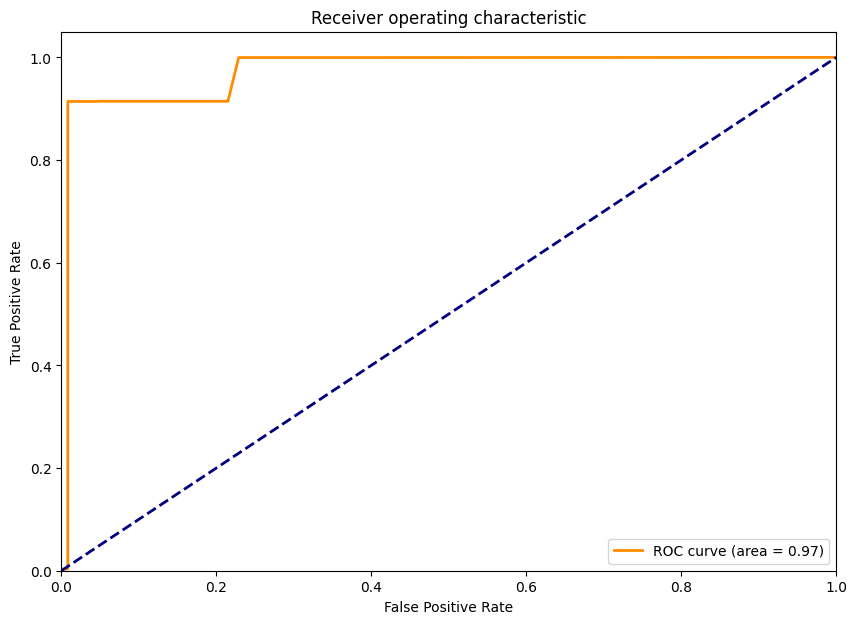

In [12]:
from sklearn.metrics import roc_curve, auc, roc_auc_score

score = max_score

fpr, tpr, thresholds = roc_curve(current_labels, score)
roc_auc = roc_auc_score(current_labels, score)

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 7))
lw = 2
plt.plot(
    fpr,
    tpr,
    color="darkorange",
    lw=lw,
    label="ROC curve (area = %0.2f)" % roc_auc,
)
plt.plot([0, 1], [0, 1], color="navy", lw=lw, linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic")
plt.legend(loc="lower right")

In [16]:
top_k = 5
y_pred_top_k = list()

for pred_seq, true_seq in zip(X_pred, X_test_oh):
    is_anomaly = False
    for j, (p_oh, t_oh) in enumerate(zip(pred_seq, true_seq)):
        if j==len(p_oh)-1:
            break
        pred_partition = np.argpartition(p_oh, len(p_oh) - top_k)[-top_k:]
        
        true_next_symbol = np.argmax(t_oh)
        if not true_next_symbol in set(list(pred_partition)):
            is_anomaly = True
    y_pred_top_k.append(1 if is_anomaly else 0)
print(y_pred_top_k[:5]), len(y_pred_top_k), len(X_pred), np.unique(y_pred_top_k, return_counts=True)

[1, 1, 1, 1, 1]


(None, 7000, 7000, (array([1]), array([7000])))

In [17]:
y_test[:5]

[0, 1, 1, 1, 0]

In [18]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test[:len(y_pred_top_k)], y_pred_top_k)

0.4745714285714286